Rows: 9,005  Columns: 17
Date range: 2022-01-01 to 2024-12-01
Date range: 2022-01-01 to 2024-12-01


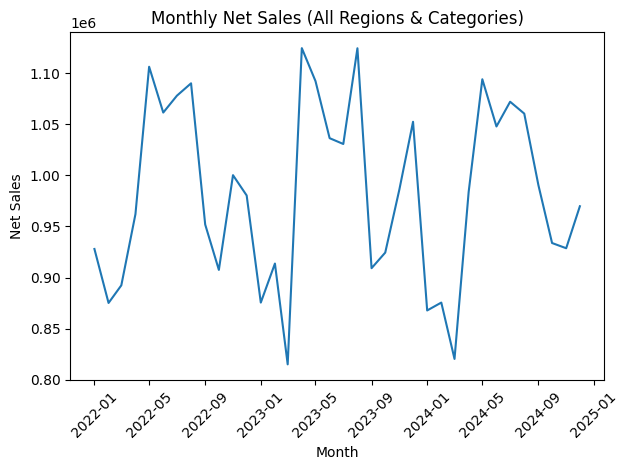

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Display options
pd.set_option("display.max_rows", 10)
pd.set_option("display.max_columns", None)

# Load data
df = pd.read_csv("salesdata.csv")
df.head()

# Convert MonthStart to datetime
df['MonthStart'] = pd.to_datetime(df['MonthStart'])

# Rows, columns, date range, and quick numeric summary
print(f"Rows: {len(df):,}  Columns: {df.shape[1]}")
print(f"Date range: {df['MonthStart'].min().date()} to {df['MonthStart'].max().date()}")
df.describe(include="all").transpose().head(20)

df.head()


# Now you can safely get the date range
print(f"Date range: {df['MonthStart'].min().date()} to {df['MonthStart'].max().date()}")


# Convert MonthStart to datetime
monthly = df.groupby("MonthStart", as_index=False)["NetSales"].sum()
plt.figure()
plt.plot(monthly["MonthStart"], monthly["NetSales"])
plt.title("Monthly Net Sales (All Regions & Categories)")
plt.xlabel("Month")
plt.ylabel("Net Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

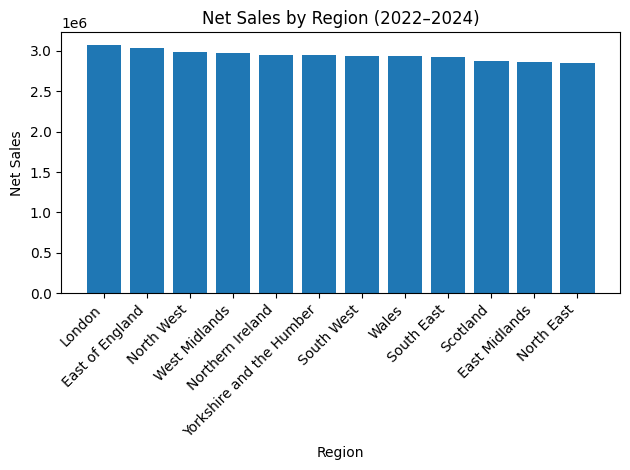

In [35]:
# Sales by region
region_sales = df.groupby("Region", as_index=False)["NetSales"].sum().sort_values("NetSales", ascending=False)
plt.figure()
plt.bar(region_sales["Region"], region_sales["NetSales"])
plt.title("Net Sales by Region (2022–2024)")
plt.xlabel("Region")
plt.ylabel("Net Sales")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

C:\Users\ara2v\AppData\Local\Temp\ipykernel_9912\3805847486.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=order, showfliers=False)


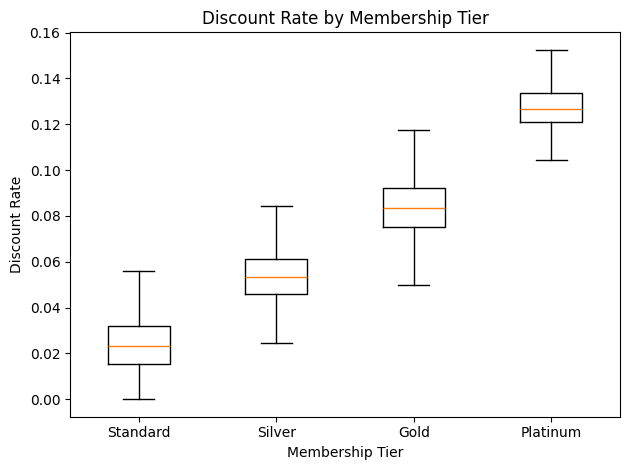

In [36]:
# Box plot of DiscountRate by MembershipTier
order = ["Standard", "Silver", "Gold", "Platinum"]
data = [df.loc[df["MembershipTier"]==tier, "DiscountRate"].values for tier in order]
plt.figure()
plt.boxplot(data, labels=order, showfliers=False)
plt.title("Discount Rate by Membership Tier")
plt.xlabel("Membership Tier")
plt.ylabel("Discount Rate")
plt.tight_layout()
plt.show()

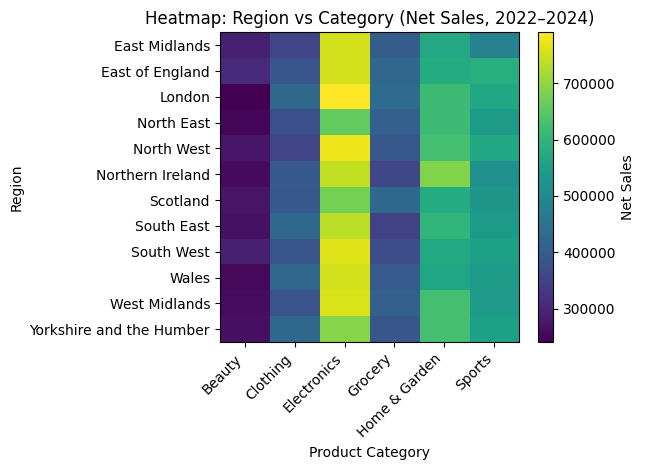

In [37]:
# Heatmap of Region vs ProductCategory
df['Year'] = pd.to_datetime(df['MonthStart']).dt.year
annual = df[df['Year'].between(2022, 2024)]
pivot = pd.pivot_table(annual, index="Region", columns="ProductCategory", values="NetSales", aggfunc="sum").fillna(0.0)

plt.figure()
plt.imshow(pivot.values, aspect="auto")
plt.title("Heatmap: Region vs Category (Net Sales, 2022–2024)")
plt.xlabel("Product Category")
plt.ylabel("Region")
plt.xticks(ticks=range(len(pivot.columns)), labels=pivot.columns, rotation=45, ha="right")
plt.yticks(ticks=range(len(pivot.index)), labels=pivot.index)
plt.colorbar(label="Net Sales")
plt.tight_layout()
 

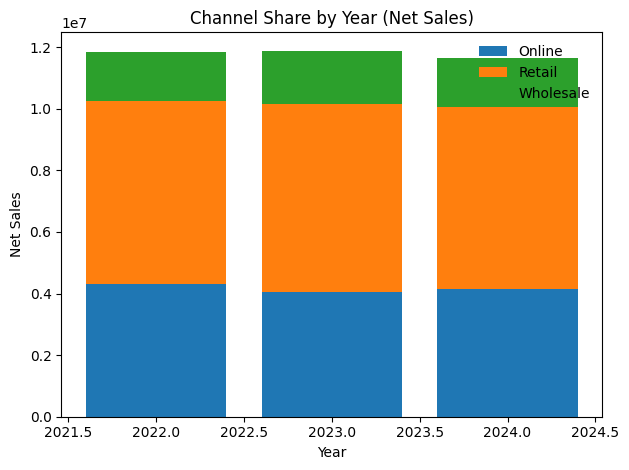

In [38]:

year_channel = df.groupby(['Year', 'Channel'], as_index=False)['NetSales'].sum()
years = sorted(year_channel['Year'].unique())
channels = list(year_channel['Channel'].unique())

# Build stacked bars
width = 0.8
bottom = np.zeros(len(years))
plt.figure()
for ch in channels:
    vals = [year_channel[(year_channel['Year']==y) & (year_channel['Channel']==ch)]['NetSales'].sum() for y in years]
    plt.bar(years, vals, bottom=bottom, width=width, label=ch)
    bottom += np.array(vals)

plt.title("Channel Share by Year (Net Sales)")
plt.xlabel("Year")
plt.ylabel("Net Sales")
plt.legend(frameon=False)
plt.tight_layout()
